In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import neighbors

from sklearn import linear_model
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing

import warnings
from os import environ

from sklearn import metrics

In [3]:
SEED = 42
np.random.seed(SEED)
kf = model_selection.RepeatedKFold(n_repeats=5, n_splits=5, random_state=SEED)

In [4]:
df = pd.read_csv("logP.csv")

y = df.logP
X = df.iloc[:, 3:]

X_norm = preprocessing.StandardScaler().fit_transform(X)

X_new = pd.DataFrame(X_norm, columns=X.columns)
X_new

QED_score  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0     1.787269           0.127882        0.127882          -0.656476   
1     0.763026           0.396384        0.396384          -0.886730   
2     0.602073          -3.606632       -3.606632           5.799582   
3    -0.890396          -0.259964       -0.259964           1.380012   
4     0.426488          -3.541863       -3.541863          -0.047930   
..         ...                ...             ...                ...   
239   1.114195           0.370272        0.370272          -0.352307   
240  -0.729444           0.156782        0.156782          -0.484305   
241   0.543545           0.567041        0.567041           1.220209   
242  -0.539227           0.267867        0.267867          -0.146797   
243  -1.095245           0.658267        0.658267          -0.175005   

     MinEStateIndex       qed     MolWt  HeavyAtomMolWt  ExactMolWt  \
0          0.800563  1.773381 -0.810439       -0.851865   -0.808816   
1         -2.143769  0.764827 -1.120393       -1.004694   -1.118134   
2          1.384245  0.602666 -1.052411       -1.154279   -1.051189   
3         -0.097196 -0.876677 -0.211984       -0.212696   -0.209756   
4          0.855580  0.424867 -1.894325       -1.961859   -1.893982   
..              ...       ...       ...             ...         ...   
239        0.511069  1.107501  0.808624        0.763732    0.811119   
240        0.652094 -0.705992 -0.163419       -0.179145   -0.160986   
241       -0.226124  0.542751 -0.925047       -0.852420   -0.923190   
242        0.355675 -0.530112 -0.164453       -0.078559   -0.161771   
243       -1.358658 -1.073473  1.278130        1.336605    1.279102   

     NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0              -0.583796  ...   -0.338906     -0.356087   -0.158777   
1              -1.028941  ...   -0.338906     -0.356087   -0.158777   
2              -0.761854  ...   -0.338906     -0.356087   -0.158777   
3              -0.049623  ...   -0.338906     -0.356087   -0.158777   
4              -1.652143  ...   -0.338906     -0.356087   -0.158777   
..                   ...  ...         ...           ...         ...   
239             0.840666  ...    2.723802     -0.356087   -0.158777   
240             0.039406  ...   -0.338906     -0.356087   -0.158777   
241            -0.850883  ...   -0.338906     -0.356087   -0.158777   
242            -0.049623  ...   -0.338906     -0.356087   -0.158777   
243             0.751637  ...    2.723802      2.446660   -0.158777   

     fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0.0      -0.06415    -0.199146          0.0     -0.326584   
1                  0.0      -0.06415    -0.199146          0.0     -0.326584   
2                  0.0      -0.06415    -0.199146          0.0     -0.326584   
3                  0.0      -0.06415    -0.199146          0.0     -0.326584   
4                  0.0      -0.06415    -0.199146          0.0     -0.326584   
..                 ...           ...          ...          ...           ...   
239                0.0      -0.06415    -0.199146          0.0     -0.326584   
240                0.0      -0.06415    -0.199146          0.0     -0.326584   
241                0.0      -0.06415    -0.199146          0.0     -0.326584   
242                0.0      -0.06415    -0.199146          0.0     -0.326584   
243                0.0      -0.06415    -0.199146          0.0      2.624765   

     fr_unbrch_alkane   fr_urea  
0           -0.122373 -0.184907  
1           -0.122373 -0.184907  
2           -0.122373 -0.184907  
3           -0.122373 -0.184907  
4           -0.122373 -0.184907  
..                ...       ...  
239         -0.122373 -0.184907  
240         -0.122373 -0.184907  
241         -0.122373 -0.184907  
242         -0.122373 -0.184907  
243         -0.122373 -0.184907  

[244 rows x 209 columns]

## search1

In [5]:
pipe = pipeline.Pipeline(
    [
        ("svm", svm.SVR()),
    ]
)

In [12]:
param_grid = {
    "svm__C": np.linspace(1, 100, 10),
    "svm__epsilon": 10 ** np.arange(-2.0, 2.0, 1),
}

In [13]:
search = model_selection.GridSearchCV(
    pipe,
    param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [15]:
svm_res = search.fit(X_new, y)

Fitting 25 folds for each of 40 candidates, totalling 1000 fits


In [19]:
svm_res.best_params_

{'svm__C': 1.0, 'svm__epsilon': 0.01}

In [20]:
svm_res.best_score_

0.439801532809672

In [ ]:
df_res = pd.DataFrame(svm_res.cv_results_)
df_res

In [23]:
df_res.groupby("param_svm__C").mean_test_score.mean()

param_svm__C
1.0      0.267913
12.0     0.268387
23.0     0.268387
34.0     0.268387
45.0     0.268387
56.0     0.268387
67.0     0.268387
78.0     0.268387
89.0     0.268387
100.0    0.268387
Name: mean_test_score, dtype: float64

In [24]:
df_res.groupby("param_svm__epsilon").mean_test_score.mean()

param_svm__epsilon
0.01     0.435407
0.10     0.435354
1.00     0.246793
10.00   -0.044196
Name: mean_test_score, dtype: float64

## search2

In [25]:
param_grid2 = {
    "svm__C": np.linspace(1, 100, 10),
    "svm__epsilon": 10 ** np.arange(-5.0, -1.0, 1),
}

In [27]:
search2 = model_selection.GridSearchCV(
    pipe,
    param_grid2,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [28]:
svm_res2 = search2.fit(X_new, y)

Fitting 25 folds for each of 40 candidates, totalling 1000 fits


In [29]:
svm_res2.best_score_

0.440172589617292

In [30]:
svm_res2.best_params_

{'svm__C': 1.0, 'svm__epsilon': 1e-05}

In [31]:
df_res2 = pd.DataFrame(svm_res2.cv_results_)
df_res2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svm__C  \
0        0.050217      0.038708         0.023301        0.015631          1.0   
1        0.034655      0.008444         0.028150        0.028598          1.0   
2        0.034450      0.005624         0.019419        0.003985          1.0   
3        0.036247      0.006465         0.021285        0.007691          1.0   
4        0.057321      0.038478         0.028959        0.027447         12.0   
5        0.051913      0.042818         0.026420        0.024643         12.0   
6        0.054596      0.042320         0.036106        0.037481         12.0   
7        0.060521      0.063737         0.035461        0.033828         12.0   
8        0.077116      0.054878         0.027688        0.009433         23.0   
9        0.052012      0.044160         0.039718        0.038050         23.0   
10       0.047220      0.027528         0.035902        0.038570         23.0   
11       0.055185      0.048174         0.029536        0.028459         23.0   
12       0.085134      0.088050         0.049226        0.056277         34.0   
13       0.060418      0.068224         0.024138        0.018023         34.0   
14       0.061170      0.056106         0.040983        0.047472         34.0   
15       0.071201      0.064192         0.039144        0.038473         34.0   
16       0.061830      0.049936         0.029999        0.028482         45.0   
17       0.082999      0.083526         0.034927        0.039495         45.0   
18       0.056404      0.045027         0.037297        0.044398         45.0   
19       0.057497      0.055705         0.046879        0.069516         45.0   
20       0.074131      0.062658         0.039474        0.035881         56.0   
21       0.046160      0.028325         0.022243        0.008115         56.0   
22       0.056345      0.027357         0.056569        0.079306         56.0   
23       0.052474      0.041262         0.024584        0.022576         56.0   
24       0.061625      0.064581         0.032080        0.036063         67.0   
25       0.066529      0.058968         0.038296        0.041140         67.0   
26       0.054125      0.043630         0.029763        0.034718         67.0   
27       0.054773      0.043594         0.021991        0.008585         67.0   
28       0.060180      0.053523         0.039339        0.041562         78.0   
29       0.044796      0.025355         0.021736        0.016268         78.0   
30       0.060289      0.041588         0.046152        0.045161         78.0   
31       0.047431      0.031062         0.024684        0.023972         78.0   
32       0.077756      0.084337         0.040394        0.042580         89.0   
33       0.033553      0.004435         0.018549        0.003925         89.0   
34       0.055738      0.045964         0.044526        0.059979         89.0   
35       0.051137      0.036341         0.028741        0.024348         89.0   
36       0.081989      0.072924         0.041792        0.040591        100.0   
37       0.052063      0.038952         0.021286        0.011457        100.0   
38       0.051472      0.043864         0.027055        0.016216        100.0   
39       0.052096      0.058315         0.027203        0.035864        100.0   

   param_svm__epsilon                                     params  \
0             0.00001     {'svm__C': 1.0, 'svm__epsilon': 1e-05}   
1              0.0001    {'svm__C': 1.0, 'svm__epsilon': 0.0001}   
2               0.001     {'svm__C': 1.0, 'svm__epsilon': 0.001}   
3                0.01      {'svm__C': 1.0, 'svm__epsilon': 0.01}   
4             0.00001    {'svm__C': 12.0, 'svm__epsilon': 1e-05}   
5              0.0001   {'svm__C': 12.0, 'svm__epsilon': 0.0001}   
6               0.001    {'svm__C': 12.0, 'svm__epsilon': 0.001}   
7                0.01     {'svm__C': 12.0, 'svm__epsilon': 0.01}   
8             0.00001    {'svm__C': 23.0, 'svm__epsilon': 1e-05}   
9 

In [33]:
df_res2.groupby("param_svm__epsilon").mean_test_score.mean()

param_svm__epsilon
0.00001    0.435088
0.00010    0.435103
0.00100    0.435131
0.01000    0.435407
Name: mean_test_score, dtype: float64

## search3

In [13]:
param_grid3 = {
    "svm__epsilon": 10 ** np.arange(-10.0, 0.0, 1),
}

In [14]:
search3 = model_selection.GridSearchCV(
    pipe,
    param_grid3,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [15]:
svm_res3 = search3.fit(X_new, y)

Fitting 25 folds for each of 10 candidates, totalling 250 fits
[CV 1/25] END ...............svm__epsilon=1e-10;, score=0.429 total time=   0.0s
[CV 2/25] END ...............svm__epsilon=1e-10;, score=0.583 total time=   0.0s
[CV 6/25] END ...............svm__epsilon=1e-10;, score=0.449 total time=   0.0s
[CV 5/25] END ...............svm__epsilon=1e-10;, score=0.418 total time=   0.0s
[CV 3/25] END ...............svm__epsilon=1e-10;, score=0.421 total time=   0.0s
[CV 9/25] END ...............svm__epsilon=1e-10;, score=0.347 total time=   0.0s
[CV 11/25] END ..............svm__epsilon=1e-10;, score=0.504 total time=   0.0s
[CV 8/25] END ...............svm__epsilon=1e-10;, score=0.561 total time=   0.0s
[CV 4/25] END ...............svm__epsilon=1e-10;, score=0.456 total time=   0.0s
[CV 12/25] END ..............svm__epsilon=1e-10;, score=0.446 total time=   0.0s
[CV 13/25] END ..............svm__epsilon=1e-10;, score=0.462 total time=   0.0s
[CV 16/25] END ..............svm__epsilon=1e-1

<Axes: xlabel='param_svm__epsilon'>

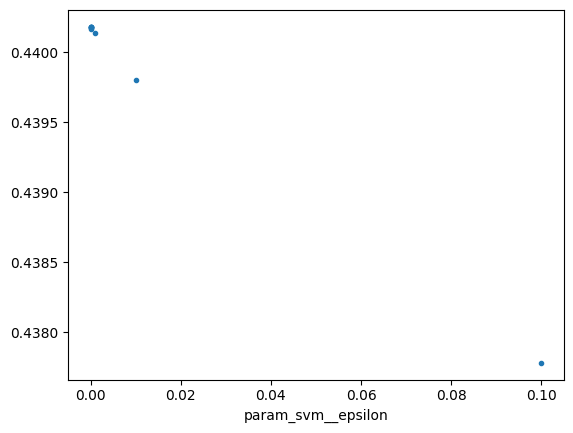

In [16]:
df_res3 = pd.DataFrame(search3.cv_results_)
res3 = df_res3.groupby("param_svm__epsilon").mean_test_score.mean()
df_res3.groupby("param_svm__epsilon").mean_test_score.mean().plot(style=".")

In [17]:
df_res3.groupby("param_svm__epsilon").mean_test_score.mean()

param_svm__epsilon
1.000000e-10    0.440181
1.000000e-09    0.440181
1.000000e-08    0.440182
1.000000e-07    0.440182
1.000000e-06    0.440178
1.000000e-05    0.440173
1.000000e-04    0.440168
1.000000e-03    0.440136
1.000000e-02    0.439802
1.000000e-01    0.437780
Name: mean_test_score, dtype: float64

## search4

In [30]:
param_grid4 = {
    "svm__C": np.linspace(1.5, 2.2, 10),
}

In [31]:
search4 = model_selection.GridSearchCV(
    pipe,
    param_grid4,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [32]:
svm_res4 = search4.fit(X_new, y)

Fitting 25 folds for each of 10 candidates, totalling 250 fits
[CV 1/25] END .......................svm__C=1.5;, score=0.455 total time=   0.0s
[CV 6/25] END .......................svm__C=1.5;, score=0.456 total time=   0.0s
[CV 2/25] END .......................svm__C=1.5;, score=0.570 total time=   0.0s
[CV 7/25] END .......................svm__C=1.5;, score=0.473 total time=   0.0s
[CV 10/25] END ......................svm__C=1.5;, score=0.357 total time=   0.0s
[CV 13/25] END ......................svm__C=1.5;, score=0.455 total time=   0.0s
[CV 12/25] END ......................svm__C=1.5;, score=0.443 total time=   0.0s
[CV 11/25] END ......................svm__C=1.5;, score=0.517 total time=   0.0s
[CV 5/25] END .......................svm__C=1.5;, score=0.436 total time=   0.0s
[CV 9/25] END .......................svm__C=1.5;, score=0.354 total time=   0.0s
[CV 3/25] END .......................svm__C=1.5;, score=0.443 total time=   0.0s
[CV 4/25] END .......................svm__C=1.

In [33]:
search4.best_params_

{'svm__C': 1.9666666666666668}

In [35]:
search4.best_score_

0.4509757538010534

<Axes: xlabel='param_svm__C'>

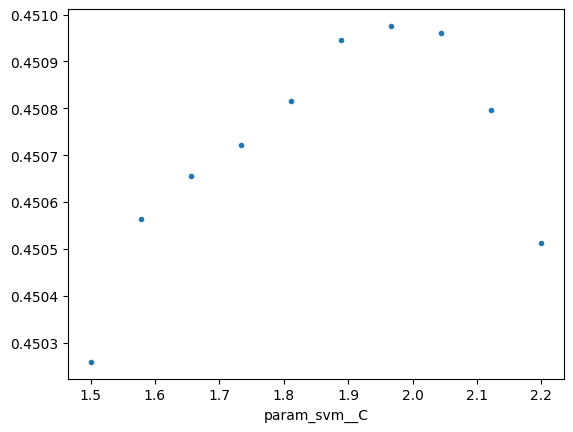

In [56]:
df_res4 = pd.DataFrame(search4.cv_results_)
res4 = df_res4.groupby("param_svm__C").mean_test_score.mean()
df_res4.groupby("param_svm__C").mean_test_score.mean().plot(style=".")

## search 5

In [47]:
param_grid5 = {"svm__kernel": ["linear", "poly", "rbf", "sigmoid"]}

In [48]:
search5 = model_selection.GridSearchCV(
    pipe,
    param_grid5,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [49]:
svm_res5 = search5.fit(X_new, y)

Fitting 25 folds for each of 4 candidates, totalling 100 fits
[CV 4/25] END ..............svm__kernel=linear;, score=-0.564 total time=   0.2s
[CV 6/25] END ...............svm__kernel=linear;, score=0.204 total time=   0.2s
[CV 1/25] END .................svm__kernel=poly;, score=0.306 total time=   0.0s
[CV 1/25] END ..............svm__kernel=linear;, score=-0.075 total time=   0.2s
[CV 2/25] END .................svm__kernel=poly;, score=0.287 total time=   0.0s
[CV 3/25] END .................svm__kernel=poly;, score=0.423 total time=   0.0s
[CV 19/25] END ..............svm__kernel=linear;, score=0.301 total time=   0.2s
[CV 4/25] END .................svm__kernel=poly;, score=0.238 total time=   0.0s
[CV 17/25] END .............svm__kernel=linear;, score=-0.194 total time=   0.2s
[CV 5/25] END .................svm__kernel=poly;, score=0.215 total time=   0.0s
[CV 7/25] END .................svm__kernel=poly;, score=0.327 total time=   0.0s
[CV 21/25] END ..............svm__kernel=linear

<Axes: xlabel='param_svm__kernel'>

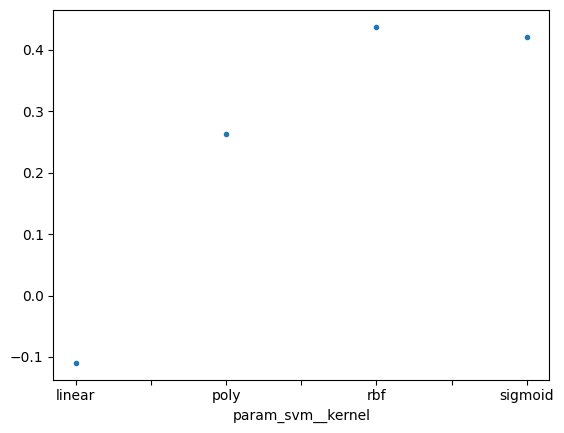

In [51]:
df_res5 = pd.DataFrame(search5.cv_results_)
res3 = df_res5.groupby("param_svm__kernel").mean_test_score.mean()
df_res5.groupby("param_svm__kernel").mean_test_score.mean().plot(style=".")

## search6

In [6]:
select_svm = feature_selection.SequentialFeatureSelector(
    svm.SVR(epsilon=10**-7, C=2), n_jobs=-1, direction="backward", cv=kf
)
select_svm.fit(X_new, y)

SequentialFeatureSelector(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=42),
                          direction='backward',
                          estimator=SVR(C=2, epsilon=1e-07), n_jobs=-1)

In [7]:
X_sel_feat_svm_names = X_new.columns[select_svm.get_support()]
X_sel_feat_svm = X_new[X_sel_feat_svm_names]
X_sel_feat_svm

MaxAbsEStateIndex  MaxEStateIndex  MinEStateIndex  NumValenceElectrons  \
0             0.127882        0.127882        0.800563            -0.583796   
1             0.396384        0.396384       -2.143769            -1.028941   
2            -3.606632       -3.606632        1.384245            -0.761854   
3            -0.259964       -0.259964       -0.097196            -0.049623   
4            -3.541863       -3.541863        0.855580            -1.652143   
..                 ...             ...             ...                  ...   
239           0.370272        0.370272        0.511069             0.840666   
240           0.156782        0.156782        0.652094             0.039406   
241           0.567041        0.567041       -0.226124            -0.850883   
242           0.267867        0.267867        0.355675            -0.049623   
243           0.658267        0.658267       -1.358658             0.751637   

     NumRadicalElectrons  MinPartialCharge  MaxAbsPartialCharge  BCUT2D_CHGHI  \
0                    0.0         -1.139513             1.077608     -0.058606   
1                    0.0         -1.141766             1.079964      1.958203   
2                    0.0          0.435702            -0.570367     -1.646831   
3                    0.0         -0.689729             0.607048     -0.016032   
4                    0.0          1.707483            -1.900892     -0.861638   
..                   ...               ...                  ...           ...   
239                  0.0          1.120213            -1.286496      0.480809   
240                  0.0         -1.053812             0.987948     -1.394691   
241                  0.0          0.356242            -0.487236     -0.012897   
242                  0.0         -2.223103             2.211249     -1.600334   
243                  0.0          0.434205            -0.568801      0.702365   

     BCUT2D_LOGPLOW    AvgIpc  ...  fr_phos_acid  fr_phos_ester  \
0          0.476799 -0.985193  ...      -0.06415       -0.06415   
1         -1.360584 -1.707270  ...      -0.06415       -0.06415   
2          1.447812 -1.037661  ...      -0.06415       -0.06415   
3          0.399508  0.964951  ...      -0.06415       -0.06415   
4          1.282729 -0.353745  ...      -0.06415       -0.06415   
..              ...       ...  ...           ...            ...   
239        0.107268  0.263746  ...      -0.06415       -0.06415   
240        0.715220 -0.555541  ...      -0.06415       -0.06415   
241        0.392079 -1.052505  ...      -0.06415       -0.06415   
242        1.198079 -0.739789  ...      -0.06415       -0.06415   
243       -0.554037  0.960287  ...      -0.06415       -0.06415   

     fr_prisulfonamd  fr_quatN  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                0.0       0.0     -0.356087   -0.158777                0.0   
1                0.0       0.0     -0.356087   -0.158777                0.0   
2                0.0       0.0     -0.356087   -0.158777                0.0   
3                0.0       0.0     -0.356087   -0.158777                0.0   
4                0.0       0.0     -0.356087   -0.158777                0.0   
..               ...       ...           ...         ...                ...   
239              0.0       0.0     -0.356087   -0.158777                0.0   
240              0.0       0.0     -0.356087   -0.158777                0.0   
241              0.0       0.0     -0.356087   -0.158777                0.0   
242              0.0       0.0     -0.356087   -0.158777                0.0   
243              0.0       0.0      2.446660   -0.158777                0.0   

     fr_tetrazole  fr_thiocyan  fr_unbrch_alkane  
0        -0.06415          0.0         -0.122373  
1        -0.06415          0.0         -0.122373  
2        -0.06415          0.0         -0.122373  
3        -0.06415          0.0         -0.122373  
4        -0.06415          0.0         -0.122373  
..            ...      

In [55]:
model_selection.cross_val_score(
    svm.SVR(epsilon=10**-7, C=2), X_sel_feat_svm, y, cv=kf
).mean()

0.6317730751916558

In [8]:
model222 = svm.SVR(epsilon=10**-7, C=2)
model222.fit(X_sel_feat_svm, y).score(X_sel_feat_svm, y)

0.9386972061363923

In [10]:
y_true = y
y_pred = model222.predict(X_sel_feat_svm)

In [13]:
metrics.mean_absolute_error(y_true, y_pred)

0.07629087683034204

In [14]:
metrics.mean_squared_error(y_true, y_pred)

0.05715621125026443

In [15]:
y_pred2 = model_selection.cross_val_predict(
    svm.SVR(epsilon=10**-7, C=2), X_sel_feat_svm, y
)

In [16]:
metrics.mean_absolute_error(y_true, y_pred2)

0.45251299071541323

In [17]:
metrics.mean_squared_error(y_true, y_pred2)

0.3615029695455261

In [25]:
mae_scores = model_selection.cross_val_score(
    svm.SVR(epsilon=10**-7, C=2),
    X_sel_feat_svm,
    y,
    cv=5,
    scoring="neg_mean_absolute_error",
)

mae_scores = -mae_scores
mae_scores.mean()

0.45226399998905115

## search7

In [88]:
pipe77 = pipeline.Pipeline(
    [
        ("svm", svm.SVR()),
    ]
)

In [86]:
param_grid7 = {
    "svm__C": np.linspace(0, 2.2, 100),
    "svm__epsilon": 10 ** np.arange(-8.0, 2.0, 1),
}

In [89]:
search7 = model_selection.GridSearchCV(
    pipe77,
    param_grid7,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [90]:
svm_res7 = search7.fit(X_new, y)

Fitting 25 folds for each of 1000 candidates, totalling 25000 fits
[CV 1/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 2/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 3/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 4/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 6/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 5/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 7/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 8/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 9/25] END .....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 10/25] END ....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 11/25] END ....svm__C=0.0, svm__epsilon=1e-08;, score=nan total time=   0.0s
[CV 12/25] END ....svm__C=0.0, svm__epsilo

/home/stas/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 25000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/home/stas/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/stas/.venv/lib64/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/stas/.venv/lib64/python3.11/site-packages/sklearn/pipeline.py", line 427, in fit
    

In [82]:
df_res7 = pd.DataFrame(search7.cv_results_)
df_res7
# res7 = df_res7.groupby('param_svm__epsilon').mean_test_score.mean()
res77 = df_res7.groupby("param_svm__C").mean_test_score.mean()
df_res7.sort_values("mean_test_score", ascending=False)
##df_res7.groupby('param_svm__epsilon').mean_test_score.mean().plot(style='.')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
776       0.007067      0.000189         0.003869        0.000106   
775       0.006947      0.000154         0.003863        0.000140   
766       0.007166      0.000530         0.003986        0.000393   
785       0.013081      0.006078         0.005534        0.003573   
774       0.007075      0.000162         0.003989        0.000116   
..             ...           ...              ...             ...   
5         0.000522      0.000160         0.000000        0.000000   
6         0.000434      0.000125         0.000000        0.000000   
7         0.000407      0.000128         0.000000        0.000000   
8         0.000504      0.000156         0.000000        0.000000   
9         0.000448      0.000148         0.000000        0.000000   

    param_svm__C param_svm__epsilon  \
776     1.711111               0.01   
775     1.711111              0.001   
766     1.688889               0.01   
785     1.733333              0.001   
774     1.711111             0.0001   
..           ...                ...   
5            0.0              0.001   
6            0.0               0.01   
7            0.0                0.1   
8            0.0                1.0   
9            0.0               10.0   

                                                params  split0_test_score  \
776  {'svm__C': 1.7111111111111112, 'svm__epsilon':...           0.458854   
775  {'svm__C': 1.7111111111111112, 'svm__epsilon':...           0.458073   
766  {'svm__C': 1.6888888888888889, 'svm__epsilon':...           0.458426   
785  {'svm__C': 1.7333333333333334, 'svm__epsilon':...           0.458479   
774  {'svm__C': 1.7111111111111112, 'svm__epsilon':...           0.457952   
..                                                 ...                ...   
5               {'svm__C': 0.0, 'svm__epsilon': 0.001}                NaN   
6                {'svm__C': 0.0, 'svm__epsilon': 0.01}                NaN   
7                 {'svm__C': 0.0, 'svm__epsilon': 0.1}                NaN   
8                 {'svm__C': 0.0, 'svm__epsilon': 1.0}                NaN   
9                {'svm__C': 0.0, 'svm__epsilon': 10.0}                NaN   

     split1_test_score  split2_test_score  ...  split18_test_score  \
776           0.586892           0.446286  ...            0.600175   
775           0.588235           0.446192  ...            0.601541   
766           0.586890           0.445969  ...            0.599429   
785           0.588253           0.446620  ...            0.602143   
774           0.588329           0.446177  ...            0.601730   
..                 ...                ...  ...                 ...   
5                  NaN                NaN  ...                 NaN   
6                  NaN                NaN  ...                 NaN   
7                  NaN                NaN  ...                 NaN   
8                  NaN                NaN  ...                 NaN   
9                  NaN                NaN  ...                 NaN   

     split19_test_score  split20_test_score  split21_test_score  \
776            0.558312            0.365822            0.600768   
775            0.559534            0.367612            0.601083   
766            0.558413            0.366177            0.600430   
785            0.559436            0.367238            0.601442   
774            0.559663            0.367833            0.601118   
..                  ...                 ...                 ...   
5                   NaN                 NaN                 NaN   
6                   NaN                 NaN                 NaN   
7                   NaN                 NaN                 NaN   
8                   NaN                 NaN                 NaN   
9                   NaN                 NaN                 NaN   

     split22_test_score  split23_test_score  split24_test_score  \
776            0.374525            0.419888            0.529500   
77

In [91]:
svm_res7.best_params_

{'svm__C': 1.7111111111111112, 'svm__epsilon': 0.01}

In [93]:
param7 = list(svm_res7.best_params_.values())

In [81]:
svm_res7.best_score_

0.45317388477827775

In [65]:
select_svm7 = feature_selection.SequentialFeatureSelector(
    svm.SVR(epsilon=param7[1], C=param7[0]), n_jobs=-1, direction="backward", cv=kf
)
select_svm7.fit(X_new, y)

SequentialFeatureSelector(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=42),
                          direction='backward',
                          estimator=SVR(C=1.7111111111111112, epsilon=0.01),
                          n_jobs=-1)

In [66]:
X_sel_feat_svm_names7 = X_new.columns[select_svm7.get_support()]
X_sel_feat_svm7 = X_new[X_sel_feat_svm_names7]
X_sel_feat_svm7

MaxAbsEStateIndex  MaxEStateIndex     MolWt  NumValenceElectrons  \
0             0.127882        0.127882 -0.810439            -0.583796   
1             0.396384        0.396384 -1.120393            -1.028941   
2            -3.606632       -3.606632 -1.052411            -0.761854   
3            -0.259964       -0.259964 -0.211984            -0.049623   
4            -3.541863       -3.541863 -1.894325            -1.652143   
..                 ...             ...       ...                  ...   
239           0.370272        0.370272  0.808624             0.840666   
240           0.156782        0.156782 -0.163419             0.039406   
241           0.567041        0.567041 -0.925047            -0.850883   
242           0.267867        0.267867 -0.164453            -0.049623   
243           0.658267        0.658267  1.278130             0.751637   

     NumRadicalElectrons  MinPartialCharge  MaxAbsPartialCharge  BCUT2D_CHGHI  \
0                    0.0         -1.139513             1.077608     -0.058606   
1                    0.0         -1.141766             1.079964      1.958203   
2                    0.0          0.435702            -0.570367     -1.646831   
3                    0.0         -0.689729             0.607048     -0.016032   
4                    0.0          1.707483            -1.900892     -0.861638   
..                   ...               ...                  ...           ...   
239                  0.0          1.120213            -1.286496      0.480809   
240                  0.0         -1.053812             0.987948     -1.394691   
241                  0.0          0.356242            -0.487236     -0.012897   
242                  0.0         -2.223103             2.211249     -1.600334   
243                  0.0          0.434205            -0.568801      0.702365   

     BCUT2D_LOGPLOW  BalabanJ  ...  fr_phenol_noOrthoHbond  fr_phos_acid  \
0          0.476799  0.289478  ...                     0.0      -0.06415   
1         -1.360584  0.979249  ...                     0.0      -0.06415   
2          1.447812  0.408830  ...                     0.0      -0.06415   
3          0.399508 -0.038145  ...                     0.0      -0.06415   
4          1.282729  0.251928  ...                     0.0      -0.06415   
..              ...       ...  ...                     ...           ...   
239        0.107268 -0.738252  ...                     0.0      -0.06415   
240        0.715220 -0.954862  ...                     0.0      -0.06415   
241        0.392079  1.174787  ...                     0.0      -0.06415   
242        1.198079 -0.256490  ...                     0.0      -0.06415   
243       -0.554037 -0.173586  ...                     0.0      -0.06415   

     fr_phos_ester  fr_prisulfonamd  fr_quatN  fr_sulfonamd  fr_sulfone  \
0         -0.06415              0.0       0.0     -0.356087   -0.158777   
1         -0.06415              0.0       0.0     -0.356087   -0.158777   
2         -0.06415              0.0       0.0     -0.356087   -0.158777   
3         -0.06415              0.0       0.0     -0.356087   -0.158777   
4         -0.06415              0.0       0.0     -0.356087   -0.158777   
..             ...              ...       ...           ...         ...   
239       -0.06415              0.0       0.0     -0.356087   -0.158777   
240       -0.06415              0.0       0.0     -0.356087   -0.158777   
241       -0.06415              0.0       0.0     -0.356087   -0.158777   
242       -0.06415              0.0       0.0     -0.356087   -0.158777   
243       -0.06415              0.0       0.0      2.446660   -0.158777   

     fr_term_acetylene  fr_tetrazole  fr_thiocyan  
0                  0.0      -0.06415          0.0  
1                  0.0      -0.06415          0.0  
2                  0.0      -0.06415          0.0  
3                  0.0      -0.06415          0.0  
4                  0.0      -0.06415          0.0  
..                 ...       

In [11]:
print(all(X_sel_feat_svm7 == X_sel_feat_svm))

True


In [72]:
model_selection.cross_val_score(
    svm.SVR(epsilon=param7[1], C=param7[0]), X_sel_feat_svm7, y, cv=kf
).mean()

0.6274752448423488

## serach 8

In [12]:
pipe77 = pipeline.Pipeline(
    [
        ("svm", svm.SVR()),
    ]
)

In [31]:
param_grid8 = {
    "svm__C": np.linspace(0, 10, 100),
    "svm__epsilon": 10 ** np.arange(-10.0, 2.0, 1),
}

In [32]:
search8 = model_selection.GridSearchCV(
    pipe77,
    param_grid8,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [33]:
svm_res8 = search8.fit(X_sel_feat_svm7, y)

Fitting 25 folds for each of 1200 candidates, totalling 30000 fits
[CV 1/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 2/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 4/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 3/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 5/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 6/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 7/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 8/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 10/25] END ....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 9/25] END .....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 12/25] END ....svm__C=0.0, svm__epsilon=1e-10;, score=nan total time=   0.0s
[CV 11/25] END ....svm__C=0.0, svm__epsilo

D svm__C=0.30303030303030304, svm__epsilon=1e-09;, score=0.415 total time=   0.0s
[CV 1/25] END svm__C=0.20202020202020202, svm__epsilon=0.1;, score=0.380 total time=   0.0s
[CV 16/25] END svm__C=0.30303030303030304, svm__epsilon=0.0001;, score=0.402 total time=   0.0s
[CV 22/25] END svm__C=0.30303030303030304, svm__epsilon=0.01;, score=0.557 total time=   0.0s
[CV 12/25] END svm__C=0.30303030303030304, svm__epsilon=0.1;, score=0.444 total time=   0.0s
[CV 23/25] END svm__C=0.20202020202020202, svm__epsilon=0.001;, score=0.304 total time=   0.0s
[CV 13/25] END svm__C=0.20202020202020202, svm__epsilon=0.01;, score=0.488 total time=   0.0s
[CV 3/25] END svm__C=0.30303030303030304, svm__epsilon=1e-06;, score=0.446 total time=   0.0s
[CV 21/25] END svm__C=0.30303030303030304, svm__epsilon=1e-10;, score=0.389 total time=   0.0s
[CV 8/25] END svm__C=0.20202020202020202, svm__epsilon=0.001;, score=0.430 total time=   0.0s
[CV 19/25] END svm__C=0.30303030303030304, svm__epsilon=1e-06;, score=0

/home/stas/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/stas/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/stas/.venv/lib64/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/stas/.venv/lib64/python3.11/site-packages/sklearn/pipeline.py", line 427, in fit
    

In [34]:
svm_res8.best_params_

{'svm__C': 3.5353535353535355, 'svm__epsilon': 1e-08}

In [36]:
svm_res8.best_score_

0.634700731666763